## **LASSO w. Cross Validation**

Best alpha using built-in LassoCV: 0.009444
Best score using built-in LassoCV: 0.953236
LassoCV coefficients: [1.79701555]
LassoCV intercept: 4.797536545076616
Prediction for [9] is 20.970676469209266


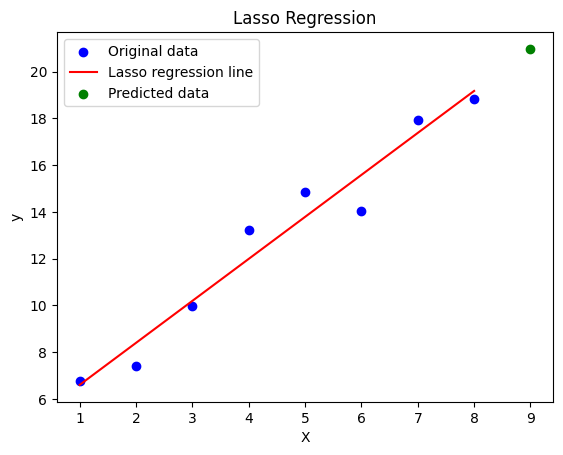

In [1]:
import numpy as np
from sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(0)

X = np.array([[1], [2], [3], [4], [5], [6], [7], [8]])
# y = 2 * x + 3 + noise
y = np.dot(X, np.array([2])) + 3 + np.random.normal(0, 1, len(X))
# Create a LassoCV model and fit it to the data
reg = LassoCV(cv=3, random_state=0)  # you can adjust the number of folds (cv) as needed
reg.fit(X, y)

print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
print("LassoCV coefficients:", reg.coef_)
print("LassoCV intercept:", reg.intercept_)

# Predicting for a new data point
new_point = np.array([[9]])
prediction = reg.predict(new_point)
print(f'Prediction for {new_point[0]} is {prediction[0]}')

# Plotting the original data points
plt.scatter(X[:, 0], y, color='blue', label='Original data')

# Plotting the regression line
x_range = np.linspace(min(X[:, 0]), max(X[:, 0]), num=100)
y_range = reg.coef_[0]*x_range + reg.intercept_
plt.plot(x_range, y_range, color='red', label='Lasso regression line')

# Plotting the predicted data point
plt.scatter(new_point[:, 0], prediction, color='green', label='Predicted data')

plt.title('Lasso Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


## **Ridge Regression**

0.9414690785410532
[3.66364577]
12.884106507142942
Prediction for [1.96396101] is 20.07936395309229


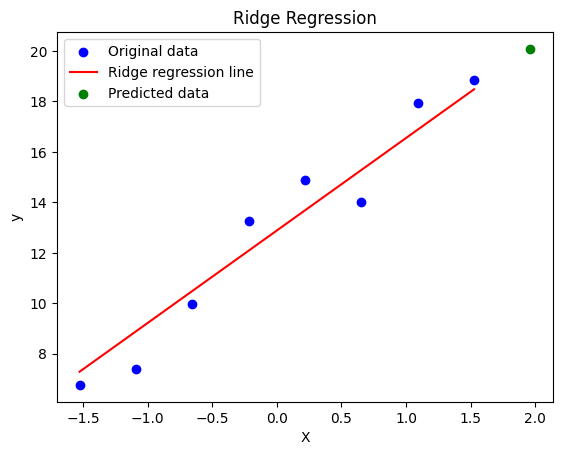

In [2]:
import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Set a random seed for reproducibility
np.random.seed(0)

X = np.array([[1], [2], [3], [4], [5], [6], [7], [8]])
# y = 2 * x + 3 + noise
y = np.dot(X, np.array([2])) + 3 + np.random.normal(0, 1, len(X))
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)
ridge = Ridge(alpha=1.0)  # Alpha is the Ridge penalty term
ridge.fit(X, y)

reg = LassoCV(cv=3, random_state=0)  # you can adjust the number of folds (cv) as needed
reg.fit(X, y)


print(ridge.score(X, y))
print(ridge.coef_)
print(ridge.intercept_)

# Predicting for a new data point
new_point = scaler.transform(np.array([[9]]))  # Make sure to also standardize any new data
prediction = ridge.predict(new_point)
print(f'Prediction for {new_point[0]} is {prediction[0]}')

# Plotting the original data points
plt.scatter(X[:, 0], y, color='blue', label='Original data')

# Plotting the regression line
x_range = np.linspace(min(X[:, 0]), max(X[:, 0]), num=100)
y_range = ridge.coef_[0]*x_range + ridge.intercept_
plt.plot(x_range, y_range, color='red', label='Ridge regression line')

# Plotting the predicted data point
plt.scatter(new_point[:, 0], prediction, color='green', label='Predicted data')

plt.title('Ridge Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


## **Random Forest Regression with Trees**

0.9788725948955085
[1.]
Prediction for [9] is 18.26381280557414


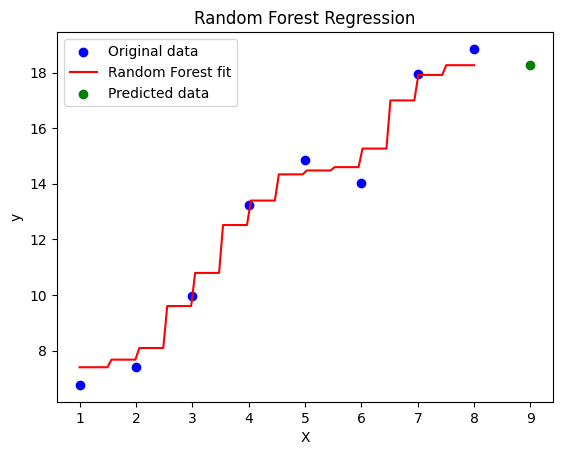

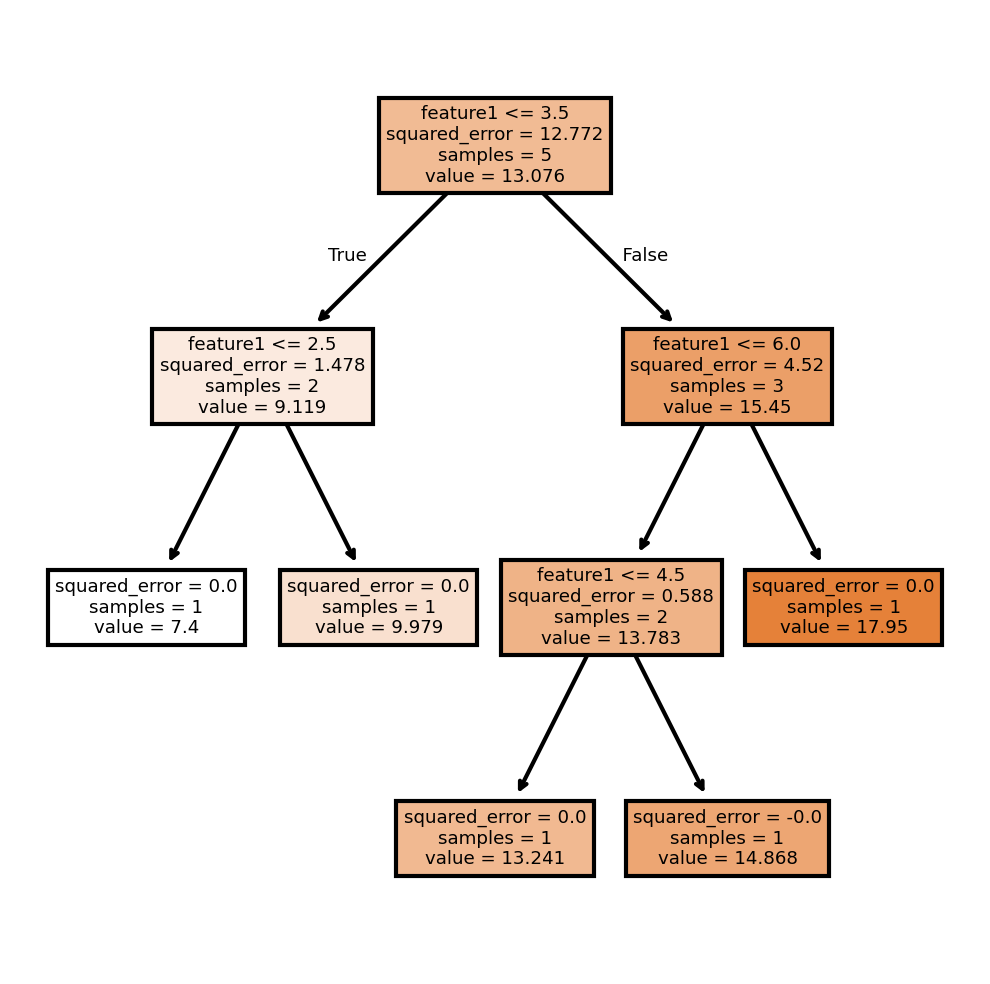

In [3]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


# Set a random seed for reproducibility
np.random.seed(0)

X = np.array([[1], [2], [3], [4], [5], [6], [7], [8]])
# y = 2 * x + 3 + noise
y = np.dot(X, np.array([2])) + 3 + np.random.normal(0, 1, len(X))
reg = RandomForestRegressor(n_estimators=100, random_state=0).fit(X, y.ravel())

print(reg.score(X, y))
print(reg.feature_importances_)

# Predicting for a new data point
new_point = np.array([[9]])
prediction = reg.predict(new_point)
print(f'Prediction for {new_point[0]} is {prediction[0]}')

# Plotting the original data points
plt.scatter(X[:, 0], y, color='blue', label='Original data')

# Plotting the regression line
x_range = np.linspace(min(X[:, 0]), max(X[:, 0]), num=100).reshape(-1, 1)
y_range = reg.predict(x_range)
plt.plot(x_range, y_range, color='red', label='Random Forest fit')

# Plotting the predicted data point
plt.scatter(new_point[:, 0], prediction, color='green', label='Predicted data')

plt.title('Random Forest Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

# Extract one tree from the forest
tree = reg.estimators_[9]

fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (4,4), dpi=300)
plot_tree(tree,
          feature_names=['feature1'],
          filled=True)

plt.show()
